Plot MFD of an earthquake catalogue and mean slip on a patch vs magnitude.

In [1]:
# Import relevant modules
from rsqsim_api.catalogue.catalogue import RsqSimCatalogue
from rsqsim_api.fault.multifault import RsqSimMultiFault
import fnmatch
import os
import numpy as np
import pandas as pd

# # Tell python where field paths etc are relative to
script_dir = os.path.abspath('')
#fault_dir = "../../../data/shaw2021/rundir5091"
fault_dir="/media/camilla/TOSHIBA EXT/NewZealand/Work/rsqsim-python-tools/data/subduction/"
catalogue_dir = fault_dir

Read in faults and earthquake catalogue. The files are quite large and can be downloaded from https://doi.org/10.5281/zenodo.5534462. Using subduction catalogue and fault model only to save RAM.

In [2]:
fault_model = RsqSimMultiFault.read_fault_file_keith(os.path.join(fault_dir,"hik_creep.flt"))
short_catalogue = RsqSimCatalogue.from_csv_and_arrays(os.path.join(catalogue_dir,"trimmed"))

Plot magnitude frequency distribution (number of events per year greater than a given magnitude against magnitude)

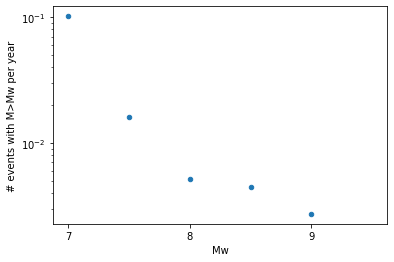

In [3]:
short_catalogue.plot_gr(fault_model,write="GR_subd.png",show=True)

Plot mean slip against magnitude for a given catalogue and fault model.

In [4]:
short_catalogue.plot_mean_slip_vs_mag(fault_model,write="slip_mw_subd.png", show=False)

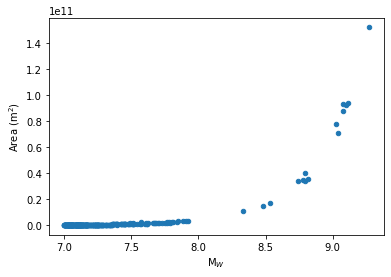

In [5]:
short_catalogue.plot_area_vs_mag(fault_model, write="area_mw_subd.png", show=True)